In [1]:
import sys
sys.path.append('../')

from src.m4_generator import M4Generator
from src.m4_data_loader import M4DataLoader
from src.error_functions import *
from src.visualization import *
from src.evaluation import *
from src.m4_model import M4Model


import numpy as np
import keras
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

Using TensorFlow backend.


# Load Data

In [2]:
EPOCHS = 100
BATCH_SIZE = 50
LOOKBACK = 48
HORIZON = 48
HIDDEN_LAYER_SIZE = 120
LOSS = mase

data_loader = M4DataLoader("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv",
                  LOOKBACK, HORIZON,  validation_ratio=0.05)

train_x, train_y = data_loader.get_training_data()
test_x, test_y = data_loader.get_test_data()
validate_x, validate_y = data_loader.get_validation_data()

training_data_generator = M4Generator(train_x, train_y, BATCH_SIZE)
test_data_generator = M4Generator(test_x, test_y, BATCH_SIZE)
validation_data_generator = M4Generator(validate_x, validate_y, BATCH_SIZE)

# Train The Model

In [3]:
model = M4Model(hidden_layer_size=HIDDEN_LAYER_SIZE, batch_size=BATCH_SIZE, lookback=LOOKBACK, 
        output_size=HORIZON, learning_rate=0.001, loss = LOSS, dropout_ratio = 0.5)

model.train(training_data_generator, test_data_generator, epochs=EPOCHS)

hist = model.evaluate(validation_data_generator)
print(hist)

Epoch 1/100
129/129 [==============================] - 40s 311ms/step - loss: 1.9848 - val_loss: 1.6789
Epoch 2/100
129/129 [==============================] - 41s 321ms/step - loss: 1.5356 - val_loss: 1.6277
Epoch 3/100
129/129 [==============================] - 37s 290ms/step - loss: 1.4439 - val_loss: 1.7692
Epoch 4/100
129/129 [==============================] - 40s 307ms/step - loss: 1.3870 - val_loss: 1.4926
Epoch 5/100
129/129 [==============================] - 47s 366ms/step - loss: 1.3524 - val_loss: 1.5666
Epoch 6/100
129/129 [==============================] - 37s 288ms/step - loss: 1.3208 - val_loss: 1.4149
Epoch 7/100
129/129 [==============================] - 38s 298ms/step - loss: 1.2970 - val_loss: 1.3747
Epoch 8/100
129/129 [==============================] - 38s 294ms/step - loss: 1.2710 - val_loss: 1.3597
Epoch 9/100
129/129 [==============================] - 41s 314ms/step - loss: 1.2450 - val_loss: 1.3789
Epoch 10/100
129/129 [==============================] - 42s 327m

129/129 [==============================] - 43s 332ms/step - loss: 0.8953 - val_loss: 1.0177
Epoch 80/100
129/129 [==============================] - 43s 331ms/step - loss: 0.8897 - val_loss: 1.0539
Epoch 81/100
129/129 [==============================] - 43s 332ms/step - loss: 0.8926 - val_loss: 1.0262
Epoch 82/100
129/129 [==============================] - 43s 336ms/step - loss: 0.8875 - val_loss: 0.9945
Epoch 83/100
129/129 [==============================] - 44s 339ms/step - loss: 0.8940 - val_loss: 1.0029
Epoch 84/100
129/129 [==============================] - 43s 337ms/step - loss: 0.8911 - val_loss: 1.0365
Epoch 85/100
129/129 [==============================] - 43s 334ms/step - loss: 0.8768 - val_loss: 0.9823
Epoch 86/100
129/129 [==============================] - 43s 332ms/step - loss: 0.8803 - val_loss: 1.0177
Epoch 87/100
129/129 [==============================] - 43s 337ms/step - loss: 0.8743 - val_loss: 1.0415
Epoch 88/100
129/129 [==============================] - 43s 333ms/st

# Save The Model

In [4]:
MODEL_BASE_DIR = '../models/3-LSTM'
model.save(MODEL_BASE_DIR)

Saved model files to disk under../models/3-LSTM/4


# Get Best And Worst Predictions

Best Predection Error is    30.8051
Worst Predection Error is   145.4576


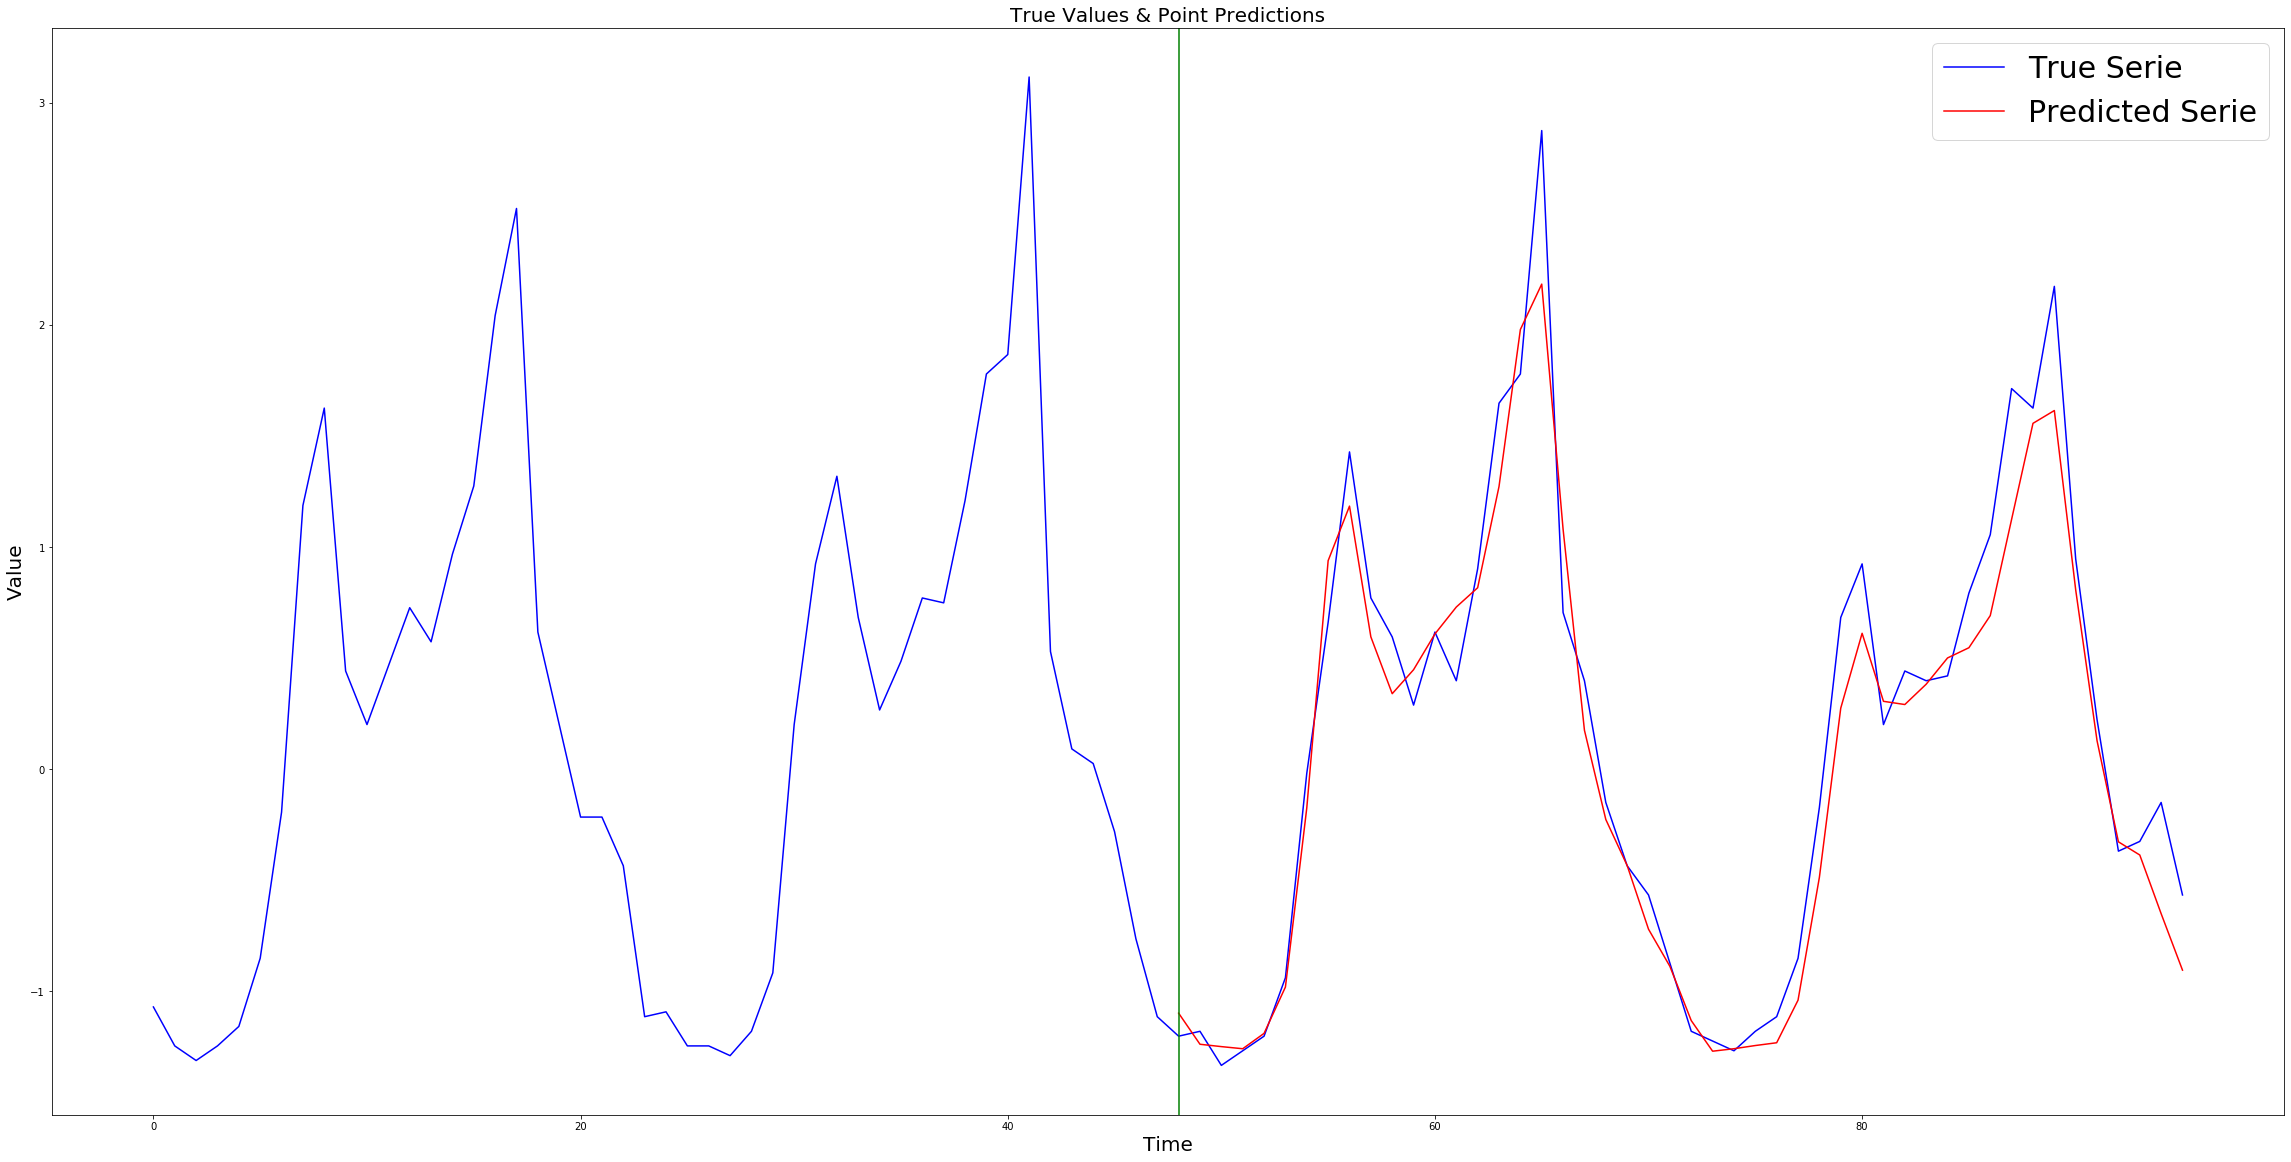

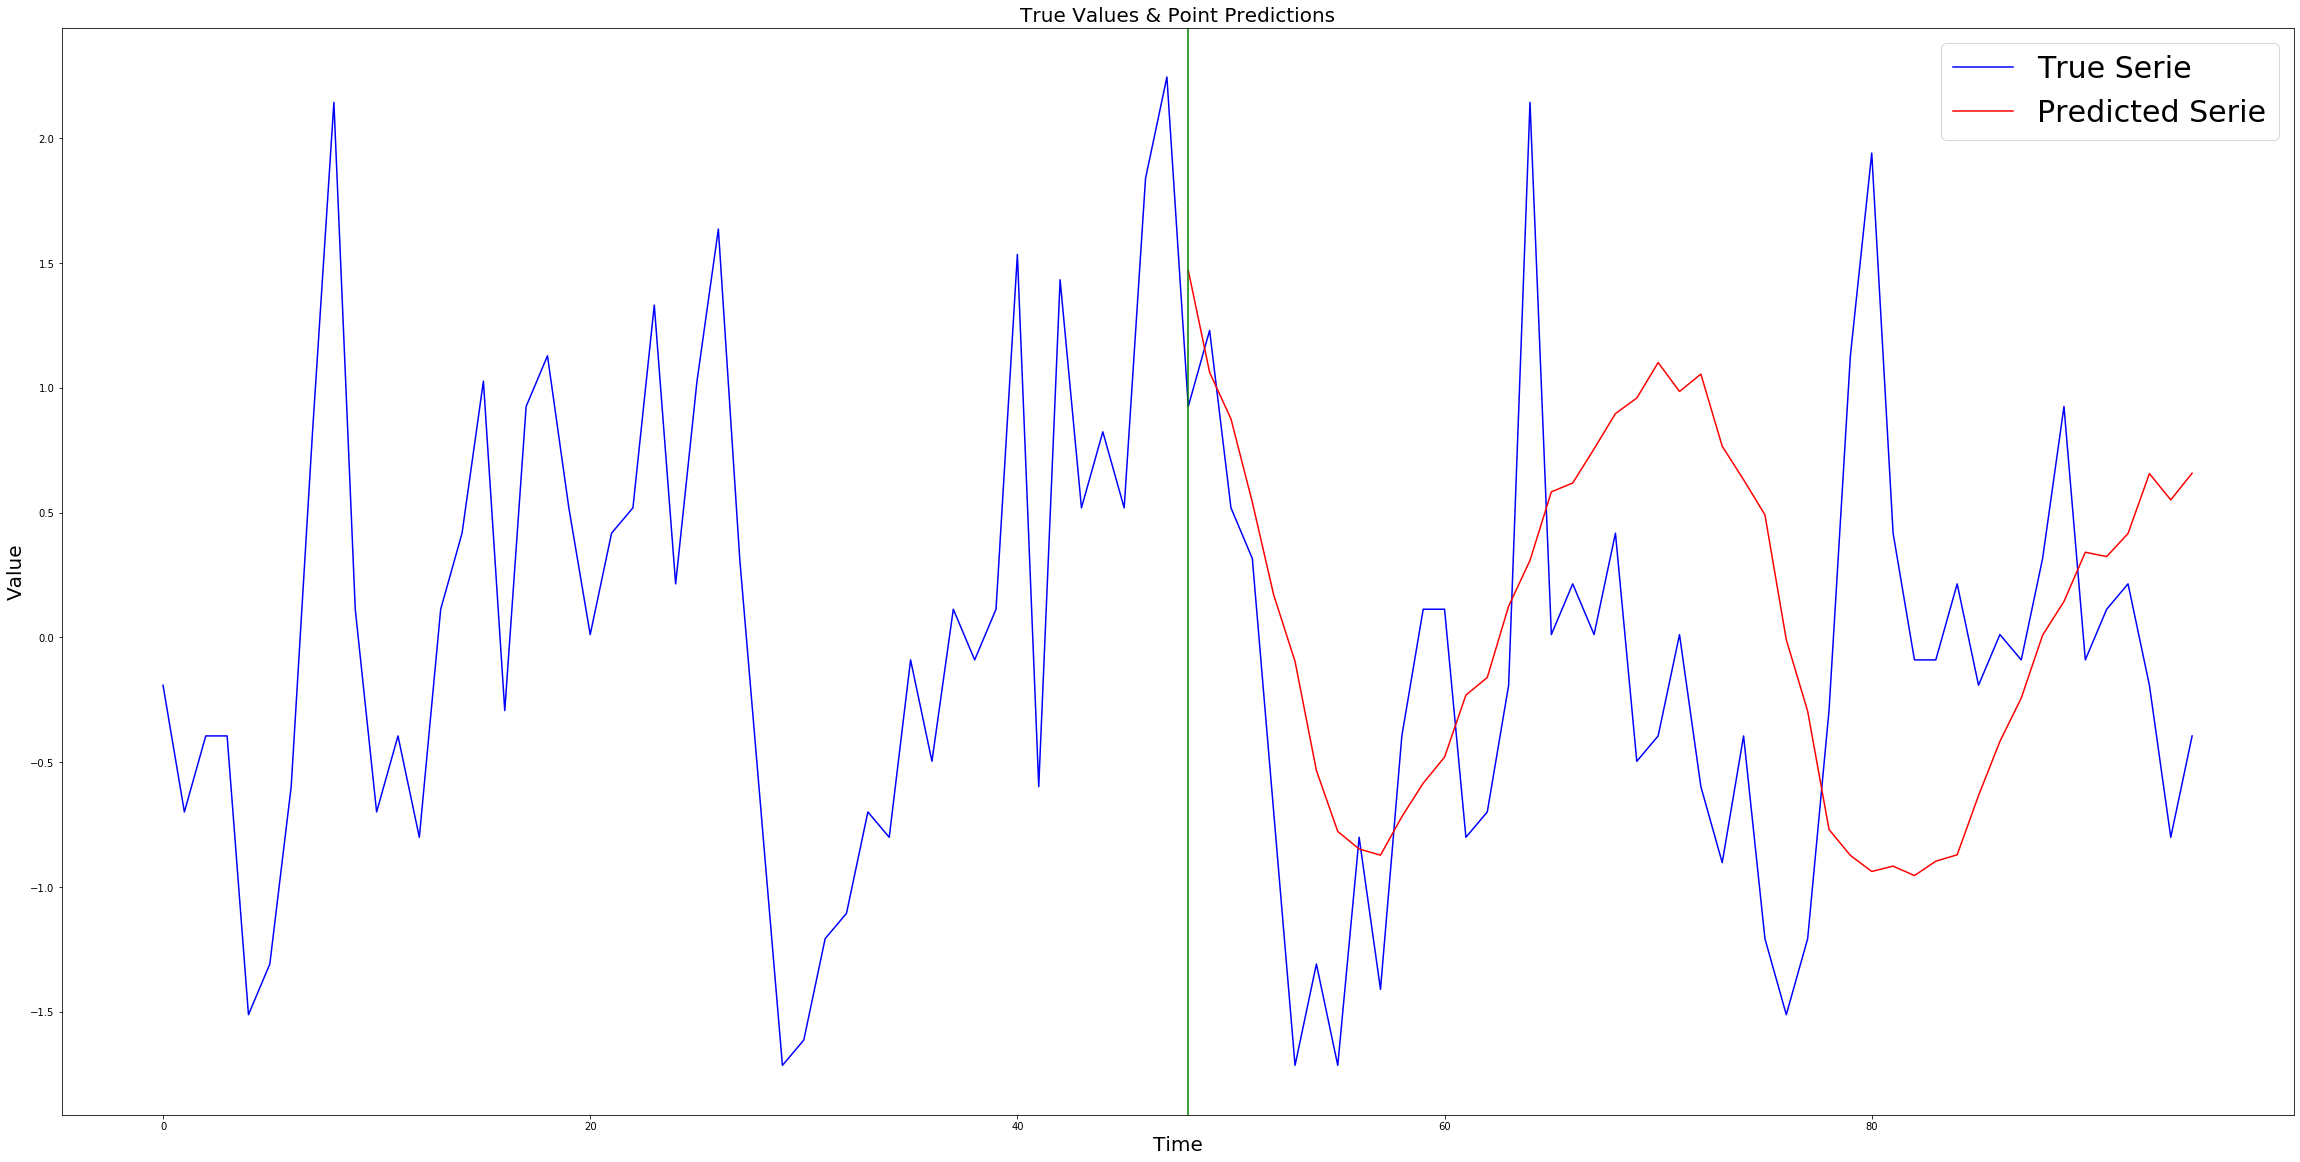

In [5]:
x, y, prediction, error =  sort_by_prediction_error(model, validate_x, validate_y, smape)

print(f'Best Predection Error is {error[0]:10.4f}')
print(f'Worst Predection Error is {error[x.shape[0]-1]:10.4f}')

plot_serie_and_prediction(x, y, prediction, serie_indx=0)
plot_serie_and_prediction(x, y, prediction, serie_indx= x.shape[0]-1)

# PLot Specific Serie From A Batch

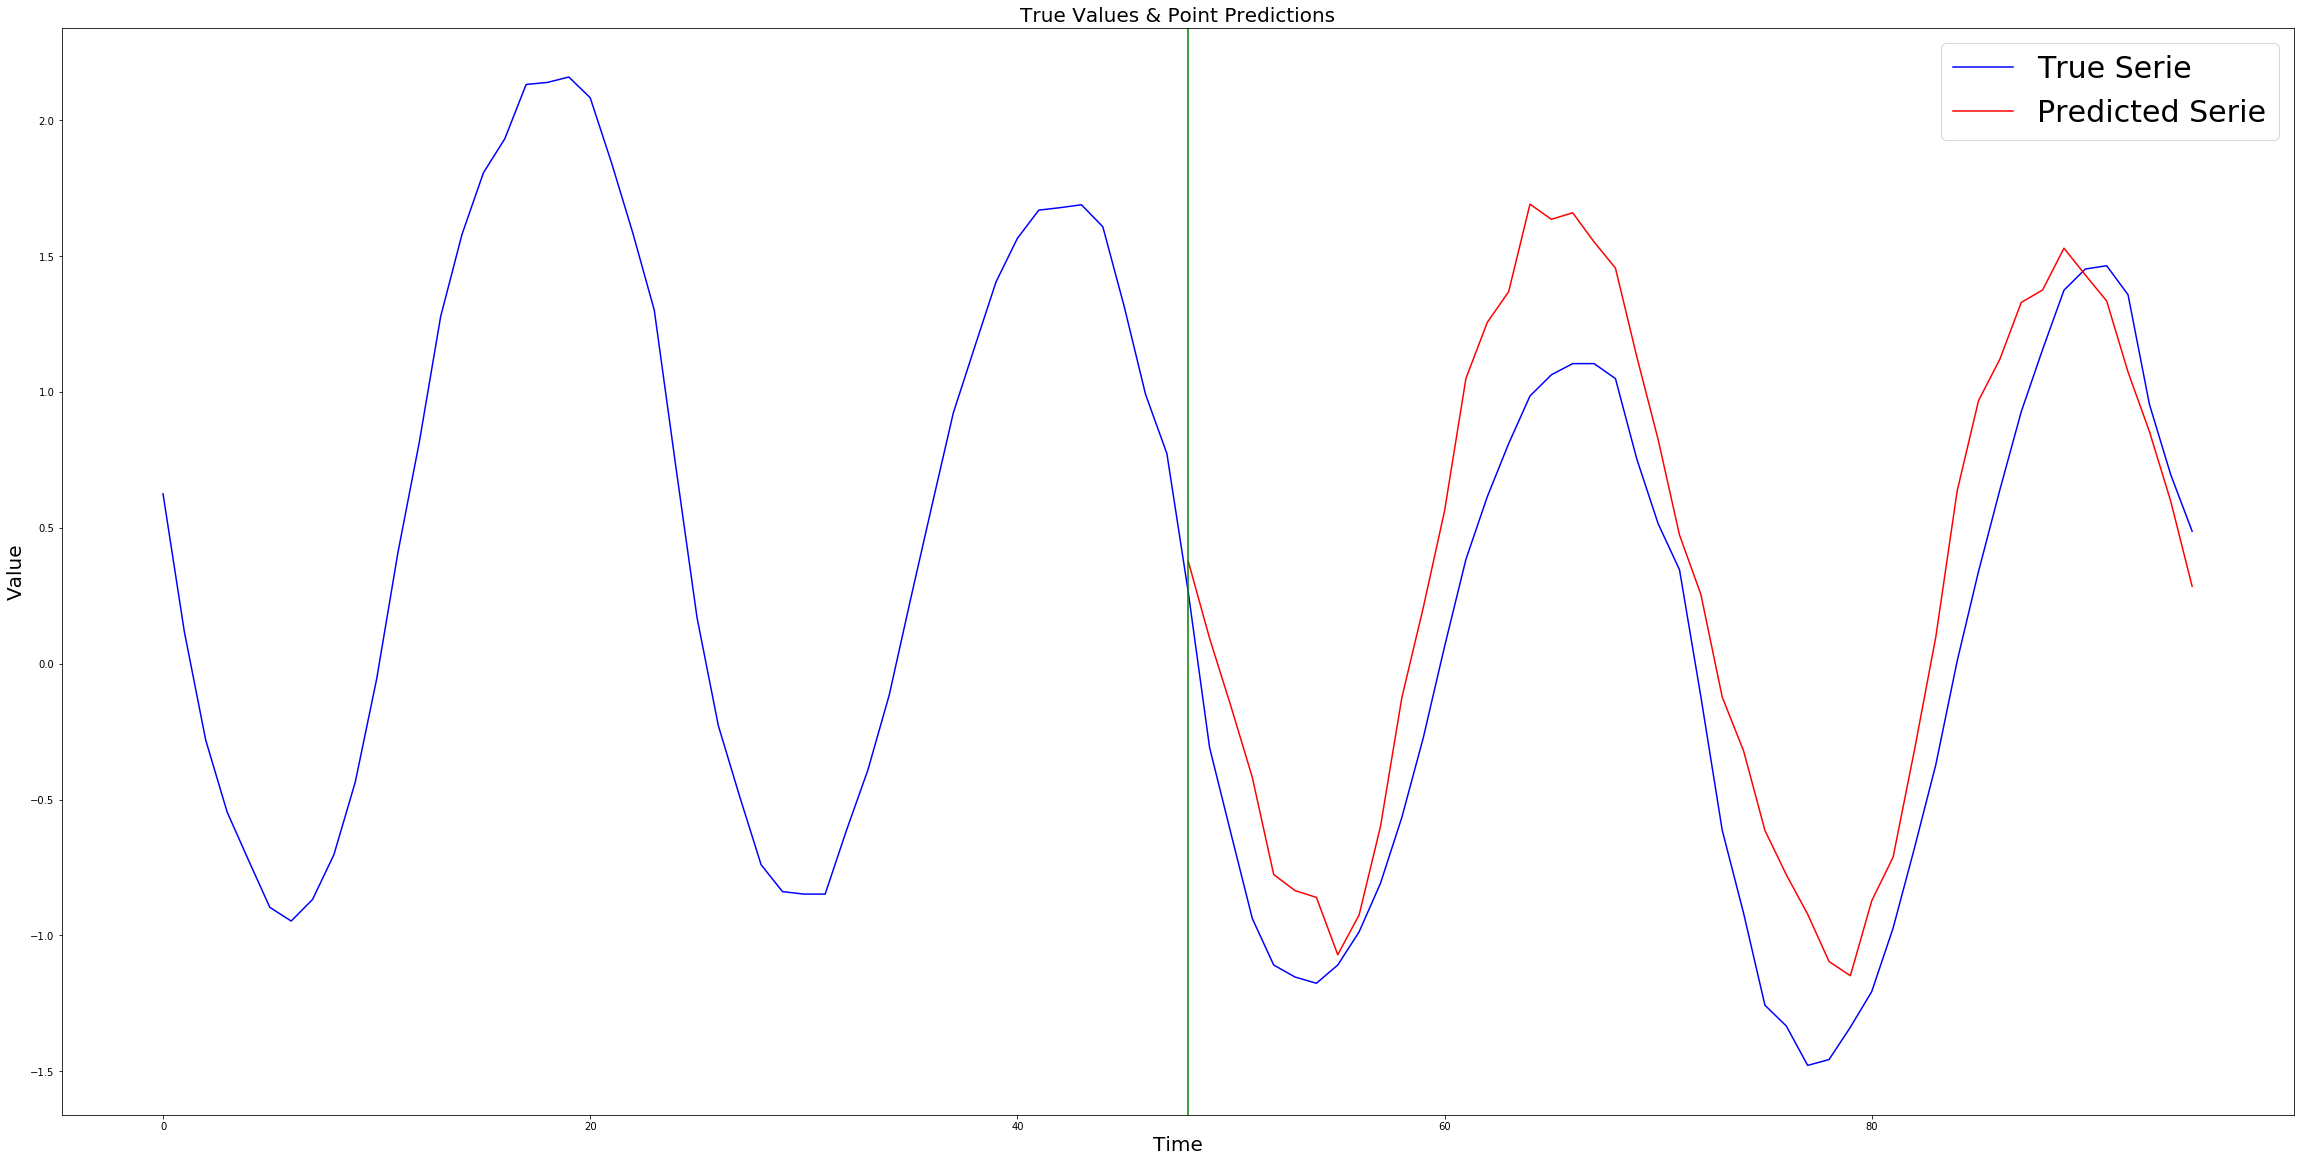

In [6]:
IDX = 1
#============ Predict Test
predictedY = model.predict(test_x[:BATCH_SIZE,:].reshape(BATCH_SIZE, LOOKBACK, 1))
#plot_series(test_x, test_y, predictedY, series_num=10)
plot_serie_and_prediction(test_x, test_y, predictedY, serie_indx=IDX)

# Evaluate A Model Against An Error Function

In [6]:
MODEL_NUMBER = 4
MODEL_BASE_DIR = '../models/3-LSTM'
training_error, test_error, validation_error = load_and_evaluate_model(f'{MODEL_BASE_DIR}/{MODEL_NUMBER}', 
                                                                       '../Dataset/Train/Hourly-train.csv', 
                                                                       '../Dataset/Test/Hourly-test.csv', mase)
print(f'Training Error For Model ({MODEL_NUMBER}) : {training_error}')
print(f'Test Error For Model ({MODEL_NUMBER}) : {test_error}')
print(f'Validation Error For Model ({MODEL_NUMBER}) : {validation_error}')

Loaded model from disk
Training Error For Model (4) : 0.8082
Test Error For Model (4) : 1.0977
Validation Error For Model (4) : 1.05
